### 머신러닝 프레임워크 : scikit-learn
다양한 분류 및 회귀를 지원하며 검증하는 기능     
분류, 회귀, 클러스터링, 차원축소가 가능하며 샘플데이터도 제공

#### XOR연산 학습해보기

In [1]:
xor_input = [
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0]
]

xor_input

[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]]

In [2]:
import pandas as pd

In [3]:
xor_df = pd.DataFrame(xor_input)
xor_df

,0,1,2
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [4]:
# Feature 만들기
xor_data = xor_df.iloc[:,0:1+1]
xor_data

,0,1
0,0,0
1,0,1
2,1,0
3,1,1


In [5]:
# Target 만들기
xor_target = xor_df.iloc[:,2]
xor_target

0    0
1    1
2    1
3    0
Name: 2, dtype: int64

In [6]:
# 데이터 학습 
from sklearn import svm, metrics

In [7]:
# 모델 만들기
clf = svm.SVC()

In [8]:
# 지도 학습 시키기
clf.fit(xor_data, xor_target)

SVC()

In [9]:
# 평가
pred = clf.predict(xor_data)
pred

array([0, 1, 1, 0], dtype=int64)

In [10]:
# 정답률 구하기 
metrics.accuracy_score(xor_target, pred)

1.0

In [11]:
clf.score(xor_data, xor_target)

1.0

---
### 붓꽃의 품종 분류하기

In [12]:
iris = pd.read_csv("../Data/iris.csv")
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
iris.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [15]:
# 품종 분류
iris["Name"].unique()
iris.Name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
# Data 크기
iris.shape

(150, 5)

In [17]:
# Data Type 
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
# 기본 통계량
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
# NaN(Not a Number)값 확인
iris.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [25]:
# SepalLength 컬럼만 NaN 확인
iris.SepalLength.isna().sum()

0

In [31]:
# iris에 Color라는 컬럼 추가 
# Iris-setosa : red
# Iris-versicolor : green
# Iris-virginica : blue

color_tmp = []
for name in iris.Name:
    if name == "Iris-setosa":
        color_tmp.append("red")
    elif name == "Iris-versicolor":
        color_tmp.append("green")
    else:
        color_tmp.append("blue")

iris["Color"] = color_tmp 

In [32]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Color
0,5.1,3.5,1.4,0.2,Iris-setosa,red
1,4.9,3.0,1.4,0.2,Iris-setosa,red
2,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5.0,3.6,1.4,0.2,Iris-setosa,red


In [33]:
iris.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Color
145,6.7,3.0,5.2,2.3,Iris-virginica,blue
146,6.3,2.5,5.0,1.9,Iris-virginica,blue
147,6.5,3.0,5.2,2.0,Iris-virginica,blue
148,6.2,3.4,5.4,2.3,Iris-virginica,blue
149,5.9,3.0,5.1,1.8,Iris-virginica,blue


### 산포도(산점도, Scatter)

In [34]:
import matplotlib.pyplot as plt

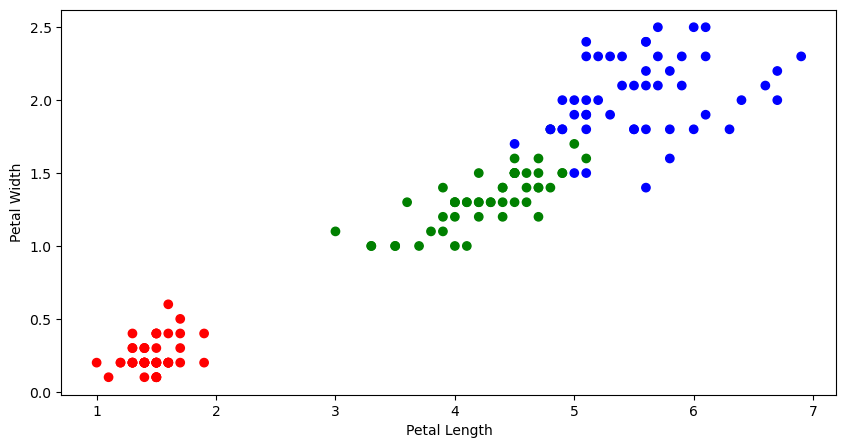

In [35]:
plt.figure(figsize=(10, 5))
plt.scatter(
    iris.PetalLength,
    iris.PetalWidth,
    c=iris.Color
)

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

plt.show()

### Machine Learning을 위한 작업 

#### Feature와 Target 구분

In [40]:
# Feature 만들기

iris.iloc[:,:3+1]
iris_data = iris.loc[:,'SepalLength':"PetalWidth"]
iris_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
# 확인
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [43]:
# Target 만들기

iris_target = iris.Name
iris_target[:5+1]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
Name: Name, dtype: object

### 학습용(Train)데이터와 검증용(Test)데이터로 나누기

In [45]:
from sklearn.model_selection import train_test_split

In [57]:
train_data, test_data, train_target, test_target = \
            train_test_split(iris_data, iris_target)

In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 90 to 101
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  112 non-null    float64
 1   SepalWidth   112 non-null    float64
 2   PetalLength  112 non-null    float64
 3   PetalWidth   112 non-null    float64
dtypes: float64(4)
memory usage: 4.4 KB


In [59]:
len(train_target)

112

In [60]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 14 to 147
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  38 non-null     float64
 1   SepalWidth   38 non-null     float64
 2   PetalLength  38 non-null     float64
 3   PetalWidth   38 non-null     float64
dtypes: float64(4)
memory usage: 1.5 KB


In [61]:
len(test_target)

38

In [62]:
print(train_data.describe())
print(test_data.describe())

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   112.000000  112.000000   112.000000  112.000000
mean      5.891964    3.036607     3.854464    1.219643
std       0.852990    0.412200     1.759345    0.752753
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.350000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000
       SepalLength  SepalWidth  PetalLength  PetalWidth
count    38.000000   38.000000    38.000000   38.000000
mean      5.700000    3.105263     3.476316    1.136842
std       0.741802    0.493716     1.772376    0.800142
min       4.400000    2.200000     1.200000    0.100000
25%       5.100000    2.800000     1.425000    0.300000
50%       5.800000    3.000000     4.150000    1.250000
75%       6.375000    3.400000     4.950000    1.775000
max       6.900000    4.200000     5.900000    2

### 학습 시키기

In [63]:
# 모델 만들기
clf = svm.SVC()

In [64]:
# 학습시키기
clf.fit(train_data, train_target)

SVC()

In [65]:
# 예측 하기
pred = clf.predict(test_data)
pred[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [66]:
# 정답률 구하기 
metrics.accuracy_score(test_target, pred)

0.9473684210526315

In [ ]:
# 훈련데이터의 예측율
clf.score(train_data, train_target)

0.9821428571428571

In [ ]:
# 검증데이터의 예측율
clf.score(test_data, test_target)

0.9473684210526315

In [69]:
# SepalLength=4.1, SepalWidth=3.5, PetalLength=1.4, PetalWidth=0.2

clf.predict([[4.1, 3.5, 1.4, 0.2]])

c:\Users\tj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [70]:
# SepalLength=8.1, SepalWidth=9.5, PetalLength=11.4, PetalWidth=1.2

iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
